#### WE DO NOT HAVE DATA FOR ALL THE STATIONS

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import cmocean.cm as cmo
#import cartopy.crs as ccrs # these ones are not needed
#import cartopy.feature as cfeature  #these ones are not needed
import matplotlib as mpl
import gsw
import warnings
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings("ignore")
#import OWSLib
font = {'size'   : 13}
mpl.rc('font', **font)

In [3]:
station_info = pd.read_csv('byfjorden_clean_data.csv') # import your data

In [4]:
station_info #look at data

,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,C0,prDM,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
0,0,0,58.33289,11.87168,39.358724,15.2260,15.2260,2.847648,2.847648,1.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,58.33294,11.87170,39.358961,15.1916,15.1916,2.833230,2.833230,1.514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,58.33294,11.87170,39.358962,15.1439,15.1439,2.803977,2.803977,2.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,58.33294,11.87170,39.358978,15.5512,15.5512,2.881293,2.881293,2.523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,58.33294,11.87170,39.358992,15.6653,15.6653,2.942498,2.942498,3.028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131744,19663,19663,NaN,NaN,NaN,NaN,NaN,3.364376,3.364376,16.828,...,2039.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5287,NaN,NaN
131745,19664,19664,NaN,NaN,NaN,NaN,NaN,3.364338,3.364338,16.828,...,2040.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5324,NaN,NaN
131746,19665,19665,NaN,NaN,NaN,NaN,NaN,3.364312,3.364312,16.829,...,2041.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5345,NaN,NaN
131747,19666,19666,NaN,NaN,NaN,NaN,NaN,3.364297,3.364297,16.829,...,2042.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5353,NaN,NaN


In [5]:
#separating the years

ctd_data_2019 = station_info[station_info['Year'] == 2019]
ctd_data_2020 = station_info[station_info['Year'] == 2020]
ctd_data_2021 = station_info[station_info['Year'] == 2021]
ctd_data_2022 = station_info[station_info['Year'] == 2022]
ctd_data_2023 = station_info[station_info['Year'] == 2023]

In [7]:
ctd_data_2020 #look at data
#np.unique(ctd_data_2020["STATION"]) 

,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,C0,prDM,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
171,1519,1519,58.34242,11.89534,NaN,15.4788,15.4788,2.764868,2.764868,1.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,1521,1521,58.34242,11.89534,NaN,15.4755,15.4755,2.762862,2.762862,1.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,1523,1523,58.34242,11.89534,NaN,15.4722,15.4722,2.760880,2.760880,1.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1524,1524,58.34242,11.89534,NaN,15.4735,15.4735,2.761176,2.761176,1.101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1525,1525,58.34242,11.89534,NaN,15.4749,15.4749,2.761865,2.761865,1.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,30458,86836,58.33848,11.88910,NaN,8.7684,8.7684,3.427910,3.427910,37.942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,30459,86837,58.33848,11.88910,NaN,8.7684,8.7684,3.427947,3.427947,37.997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,30460,86838,58.33848,11.88910,NaN,8.7677,8.7677,3.428034,3.428034,37.997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15000,30461,86839,58.33848,11.88910,NaN,8.7674,8.7674,3.428102,3.428102,38.116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#fix data


#ctd_data_202['STATION'].replace({"ST_B1":"ST_10", "ST_B1_1":"ST_11",
#       'ST_B2':"ST_12", 'ST_B2_1':"ST_13", 'ST_B3':"ST_14"}, inplace=True) # chaging the names of sattions so the number is 
                                                                         # at the end and also all the sation names have to be
                                                                         # different


# the 2022 dataset doesn't have latitute and longitute data, so I added it manually from the reports

#latitude_data = {'ST_1':58.341167, 'ST_2':58.332333, 'ST_3':58.343167, 'ST_4':58.3385, 'ST_5':58.334833, 
                 "ST_6":58.332167}


#longitude_data = {'ST_1':11.893667, 'ST_2':11.8705, 'ST_3':11.903333, 'ST_4':11.892167, 'ST_5':11.880667,
                  "ST_6":11.870833}   # Coordinates of ST_thu_9 in the report are wrong; found in ctd data file; 
                                      # neveike nes buvo parasyta ST_thu3_9


# Add latitude values based on the 'STATION' column
#ctd_data_2023['latitude'] = ctd_data_2023['STATION'].map(latitude_data)
#ctd_data_2023['longitude'] = ctd_data_2023['STATION'].map(longitude_data)


#ctd_data_2023 #look at data


,Unnamed: 0.1,Unnamed: 0,latitude,longitude,timeJ,t090C,T0,c0S/m,C0,prDM,...,scan,t190C,T1,c1S/m,C1,sbeox1V,oxy1,xmiss,potemp090C,sbeox0PS
104992,0,0,58.332333,11.870500,NaN,18.8761,18.8761,2.574124,2.574124,1.466,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,74.6318,18.8759,105.739
104993,1,1,58.332333,11.870500,NaN,18.8760,18.8760,2.574212,2.574212,1.466,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,74.5929,18.8758,105.722
104994,2,2,58.332333,11.870500,NaN,18.8759,18.8759,2.574307,2.574307,1.466,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,74.5498,18.8757,105.709
104995,3,3,58.332333,11.870500,NaN,18.8758,18.8758,2.574412,2.574412,1.466,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,74.5016,18.8756,105.692
104996,4,4,58.332333,11.870500,NaN,18.8756,18.8756,2.574522,2.574522,1.465,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,74.4481,18.8754,105.679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131744,19663,19663,58.332167,11.870833,NaN,NaN,NaN,3.364376,3.364376,16.828,...,2039.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5287,NaN,NaN
131745,19664,19664,58.332167,11.870833,NaN,NaN,NaN,3.364338,3.364338,16.828,...,2040.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5324,NaN,NaN
131746,19665,19665,58.332167,11.870833,NaN,NaN,NaN,3.364312,3.364312,16.829,...,2041.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5345,NaN,NaN
131747,19666,19666,58.332167,11.870833,NaN,NaN,NaN,3.364297,3.364297,16.829,...,2042.0,NaN,NaN,NaN,NaN,NaN,NaN,92.5353,NaN,NaN


In [17]:
#ctd_data_2021[['longitude', 'STATION']] cia reikejo prachekint kod4l yra nan values longitude'e

In [8]:
array_2019 = ctd_data_2019.to_xarray().set_coords(['STATION'])
array_2020 = ctd_data_2020.to_xarray().set_coords(['STATION'])
array_2021 = ctd_data_2021.to_xarray().set_coords(['STATION'])
array_2022 = ctd_data_2022.to_xarray().set_coords(['STATION'])
array_2023 = ctd_data_2023.to_xarray().set_coords(['STATION'])  # transform the pandas dataframe to an xarray dataset

In [9]:
np.unique(array_2020.STATION) # get all the different stations in the dataset by calling on the unique station names

array(['ST_1', 'ST_2', 'ST_3', 'ST_8'], dtype=object)

In [10]:
step1 = array_2020.groupby('STATION')['ST_1'] # testing functions for the loop
step2 = step1.set_coords('prDM')
step3 = step2.swap_dims({'index':'prDM'})
step4 = step3.sortby('prDM')
step7 = step4.expand_dims({'Station':['ST_1']})
step8 = step7.groupby('prDM').mean('prDM')
step9 = step8.interp(prDM=np.arange(0,50.1,0.1))

In [11]:
temp = []

for station in np.unique(array_2020.STATION):                # the index in station -> the loop goes throu every station
    
    step1 = array_2020.groupby('STATION')[station]           # grouping every station together
    step2 = step1.set_coords('prDM')                 # determin prDM as a coordinate
    step3 = step2.swap_dims({'index':'prDM'})        # replace the index dimension with prDM as a dimention
    step4 = step3.sortby('prDM')                     # sort prDM so that they are in ascended order
    
    step7 = step4.expand_dims({'Station':[station]}) # adding station as a dimention

    step8 = step7.groupby('prDM').mean('prDM')       # group the values by prDM groups, them culculate the mean of them

    step9 = step8.interp(prDM=np.arange(0,50.1,0.1)) # now interpolate it (grid it), 
    
    temp.append(step9)
    print(station)
#DS  = xr.concat(temp,dim='Station')


ST_1
ST_2
ST_3
ST_8


In [12]:
DS = xr.concat(temp,dim='Station')

In [14]:
DS = DS.sel(Station=['ST_1', 'ST_2', 'ST_3', 'ST_8'])

In [15]:
[int(station[3:]) for station in DS.Station.values]

[1, 2, 3, 8]

In [16]:
DS['Station'] = np.array([int(station[3:]) for station in DS.Station.values])

In [17]:
DS['latitude'] = DS['latitude'].mean('prDM')
DS['longitude'] = DS['longitude'].mean('prDM')


In [18]:
DS['distance'] = ('Station'), np.zeros(len(DS.Station))

In [19]:
DS['distance'][1:] = np.cumsum(gsw.distance(DS['longitude'],DS['latitude']))/1000

In [20]:
DS = DS.rename({'t090C':'temperature'})

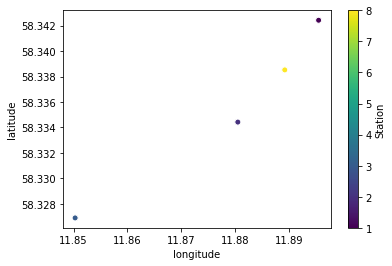

In [21]:
DS.plot.scatter(x='longitude',y='latitude',hue='Station')

In [22]:
DS = DS.set_coords(['longitude','latitude'])

In [23]:
DS_sorted = DS.sortby('longitude') # the stations in the next code have to be in the order of increasing x axis (longitude) 
                               # so using this to see what is the order
DS_sorted

<xarray.Dataset>
Dimensions:       (Station: 4, prDM: 501)
Coordinates:
  * Station       (Station) int64 3 2 8 1
    latitude      (Station) float64 58.33 58.33 58.34 58.34
    longitude     (Station) float64 11.85 11.88 11.89 11.9
  * prDM          (prDM) float64 0.0 0.1 0.2 0.3 0.4 ... 49.7 49.8 49.9 50.0
Data variables: (12/33)
    Unnamed: 0.1  (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    Unnamed: 0    (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    timeJ         (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    temperature   (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    T0            (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    c0S/m         (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    ...            ...
    sbeox1V       (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    oxy1          (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    xmiss         (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    potemp090C    (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    sbeox0PS      (prDM, Station) float64 nan nan nan nan ... nan nan nan nan
    distance      (Station) float64 3.197 1.247 5.809 0.0

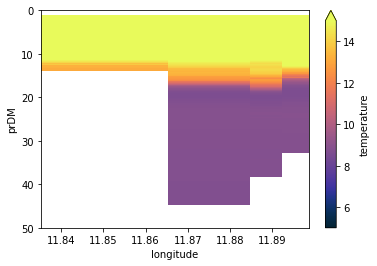

In [24]:
DS.sel(Station=[3, 2, 8, 1])['temperature'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0),x='longitude',
                                                                                               cmap='cmo.thermal',
                                                                                               vmin=5,vmax=15)
#all stations have to be with different names and written in row of increasing longitude; vmax and vmin allow to change the limits of colour bar

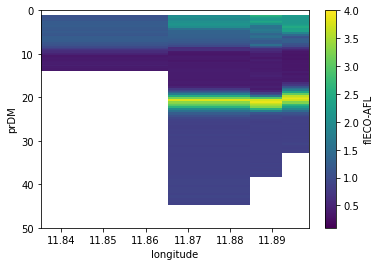

In [25]:
#Galima daugiau virsaus nukirpt ir kartu reik kazkaip pakeist vienetus
DS.sel(Station=[3, 2, 8, 1])['flECO-AFL'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0), 
                                                                                                        x='longitude',
                                                                                                        vmin=0.1,vmax=4)

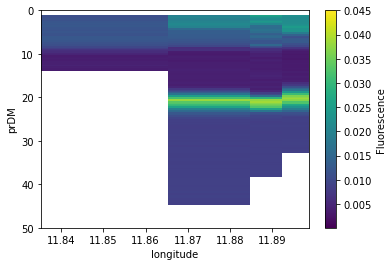

In [27]:
#Same plot with the "fixed" fluoresence data
DS.sel(Station=[3, 2, 8, 1])['Fluorescence'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0), 
                                                                                                        x='longitude',
                                                                                                        vmin=0.0001,vmax=0.045)

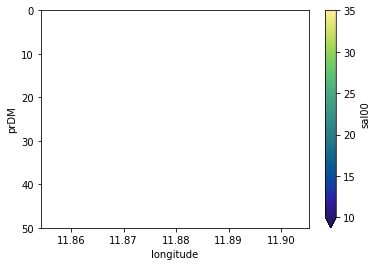

In [48]:
DS.sel(Station=[23,  33,  13,  29, 110,  22,  12,  32, 210,  39,  31,  21,  11])['sal00'].swap_dims({'Station':'longitude'}).plot(ylim=(50,0),x='longitude',
                                                                                               cmap='cmo.haline',
                                                                                               vmin=10,vmax=35)

In [57]:
ds_ew = DS.sel(Station=[1,2,3,4,5,6,8,9,10,14])

In [58]:
ds_ew

<xarray.Dataset>
Dimensions:      (Station: 10, prDM: 501)
Coordinates:
  * Station      (Station) int64 1 2 3 4 5 6 8 9 10 14
    latitude     (Station) float64 58.34 58.34 58.33 58.33 ... 58.32 58.31 58.31
    longitude    (Station) float64 11.9 11.89 11.88 11.87 ... 11.79 11.77 11.74
  * prDM         (prDM) float64 0.0 0.1 0.2 0.3 0.4 ... 49.6 49.7 49.8 49.9 50.0
Data variables: (12/18)
    scan         (prDM, Station) float64 nan 548.2 129.9 nan ... nan nan nan nan
    p            (prDM, Station) float64 nan 0.0 0.0 nan nan ... nan nan nan nan
    temperature  (prDM, Station) float64 nan 18.0 18.41 nan ... nan nan nan nan
    T0           (prDM, Station) float64 nan 18.0 18.41 nan ... nan nan nan nan
    c0S/m        (prDM, Station) float64 nan 0.739 2.317 nan ... nan nan nan nan
    C0           (prDM, Station) float64 nan 0.739 2.317 nan ... nan nan nan nan
    ...           ...
    potemp090C   (prDM, Station) float64 nan 18.0 18.41 nan ... nan nan nan nan
    sal00        (prDM, Station) float64 nan 4.774 16.28 nan ... nan nan nan nan
    sbeox0ML/L   (prDM, Station) float64 nan 6.218 5.245 nan ... nan nan nan nan
    sbeox0PS     (prDM, Station) float64 nan 96.58 87.98 nan ... nan nan nan nan
    flag         (prDM, Station) float64 nan -9.99e-29 -9.99e-29 ... nan nan nan
    distance     (Station) float64 0.0 0.7598 1.546 2.198 ... 7.181 8.291 16.03

In [66]:
DS['SA'] = gsw.SA_from_SP(DS.sal00,DS.prDM,DS.longitude,DS.latitude)
DS['CT'] = gsw.CT_from_t(DS['SA'],DS['temperature'],DS['prDM'])
DS['rho'] = gsw.rho(DS['SA'],DS['CT'],DS['prDM'])


In [90]:
DS['N2'] = ('Station','prDM'), np.zeros((len(DS.Station),len(DS.prDM))) * np.nan
DS['N2'].values[:,1:] = gsw.Nsquared(DS['SA'],DS['CT'],DS['depSM'])[0].T

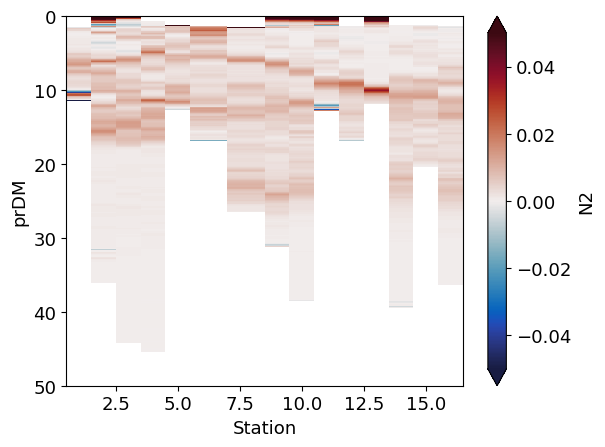

In [101]:
DS['N2'].plot(x='Station',ylim=(50,0),vmax=.05,vmin=-.05,cmap='cmo.balance')

(-0.01, 0.1)

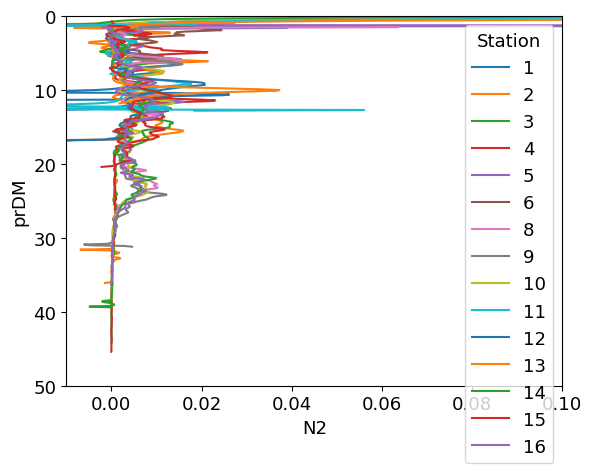

In [118]:
DS['N2'].plot(y='prDM',ylim=(50,0),hue='Station')
plt.xlim(-1e-2,1e-1)